## Imports

In [1]:
import numpy as np
import sonnetTools as sTools
import hmmTools as hTools
import generationTools as gTools
import visualizationTools as vTools
from hmmlearn import hmm
import warnings
from sklearn.preprocessing import LabelEncoder

# Scikit learn has a bug. Fixed in unreleased version
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Helper Functions

In [2]:
def writeSonnetsToFile(sonnets, filepath, header=None):
    f = open(filepath, 'w+')
    if header!=None:
        f.write(header)
        f.write('\n\n')
    for sonnet in sonnets:
        for lineInd in range(len(sonnet)):
            line = sonnet[lineInd]
            strLine = ' '.join(line)
            if lineInd%2 == 0:
                # Even index lines are the start of sentences
                strLine = strLine.capitalize() + ',\n'
            else:
                # Odd index lines are the end of sentences
                strLine = strLine + '.\n'
            f.write(strLine)
        f.write('\n')
    return

def writeHaikusToFile(haikus, filepath, header=None):
    f = open(filepath, 'w+')
    if header!=None:
        f.write(header)
        f.write('\n\n')
    for haiku in haikus:
        for line in haiku:
            strLine = ' '.join(line)
            strLine = strLine + '\n'
            f.write(strLine)
        f.write('\n')
    return

## Load Sonnets and Dictionaries

In [3]:
syllableDict = sTools.readInSyllableCounts('data/Syllable_dictionary.txt')
sonnets = sTools.readInSonnets('data/shakespeare.txt', syllableDict)
rhymingDict = sTools.buildRhymingDict(sonnets)

## Convert sonnets to a form compatible with the HMM library

In [4]:
lineLengths = [[len(line) for line in sonnet] for sonnet in sonnets]
flattenedLengths = [length for sonnet in lineLengths for length in sonnet]
flattenedSonnets = [word for sonnet in sonnets for line in sonnet for word in line]

In [5]:
encoder = LabelEncoder()
encoder.fit(flattenedSonnets)
encodedSonnets = encoder.transform(flattenedSonnets)
hmmPreparedSonnets = encodedSonnets.reshape(-1,1)

## Train HMMs

In [6]:
stateCounts = [2,4,8,16,32]
n_steps = 100
trainedModels = []
trainedModelParams = []
for n_states in stateCounts:
    model = hTools.trainHMM(hmmPreparedSonnets, flattenedLengths, n_states, n_steps)
    trainedModels.append(model)
    trainedModelParams.append(hTools.extractModelParams(model))

/home/tony/CS155/env/lib/python3.5/site-packages/hmmlearn/hmm.py:405: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T


## Representative Sonnets and Haikus

In [7]:
sonnet = gTools.generateNaiveSonnet(trainedModelParams[-1], encoder, syllableDict)
print("Shakespearean Sonnet, no rhyming, no meter\n")
print(gTools.formatSonnetToText(sonnet))

Shakespearean Sonnet, no rhyming, no meter

Why all war boast and when love art what us,
why what good shames what with your brave lived when.
The most the breast with mud is loved with me,
while i have thy pride buds doth form mine your.
And pays thy spirit thou know our love they with,
of thy youth now her side for i of thy.
What the own sick of a woe buds be thou,
and the rank heart no not my worse than in.
Than earth that looks with grows in me can not,
and shows the rank am old an deep wife with.
And what my eye he too far he sleep like,
when loss wrought seen dwell seem brow stay blind what.
That all to in my dust when sad doth broke,
thy now to art and he and time on whom.



In [8]:
sonnet = gTools.generateRhymingSonnet(trainedModelParams[-1], encoder, syllableDict, rhymingDict)
print("Shakespearean Sonnet, rhyming, no meter\n")
print(gTools.formatSonnetToText(sonnet))

/home/tony/CS155/Sonnets/cs155_miniproject_3/hmmTools.py:74: RuntimeWarning: invalid value encountered in true_divide
  p_out[mask] /= norm
/home/tony/CS155/Sonnets/cs155_miniproject_3/hmmTools.py:76: RuntimeWarning: invalid value encountered in less
  x_out = np.random.choice([x for x in range(n_output)], p=p_out)


Shakespearean Sonnet, rhyming, no meter

I should the remembrance that warning it,
why that one two praise with exceed are is.
O gives pluck no so to his waste with it,
so what art my blamed but break thy amiss.
As i is my name they for masonry,
with which is ne'er rhyme rage by your perceived.
For is eyes verse dost friend mourn memory,
till them how beauty's cunning deceived.
Thy me to untold physic and better,
it two devised in beauty's thing lengths you.
But lov'st our face i excuse greater,
do for my nerves than precious her or true.
The first i finds my stands and in hell it,
when then my steepy beguiled lies your sit.



In [9]:
haiku = gTools.generateHaiku(trainedModelParams[-1], encoder, syllableDict)
print("Traditional Haiku\n")
print(gTools.formatHaikuToText(haiku))

Traditional Haiku

to what for love that
all worse fair in thou me cures
how show my breast sold



In [10]:
haiku = gTools.generateRhymingHaiku(trainedModelParams[-1], encoder, syllableDict, rhymingDict)
print("Haiku with rhyming\n")
print(gTools.formatHaikuToText(haiku))

Haiku with rhyming

the mayst shall heart you
to to seem self that are poor
whoe'er thy rich new



## Create and Save Sonnets and Haikus

In [11]:
n_sonnets = 10 # Naive Sonnets to make per model
for ind in range(len(stateCounts)):
    n_states = stateCounts[ind]
    modelParams = trainedModelParams[ind]
    sonnets = [gTools.generateNaiveSonnet(modelParams, encoder, syllableDict) for _ in range(n_sonnets)]
    title = "Naive Hidden Markov Model: %d hidden states" % n_states
    filetarget = "HMM-%02d-naiveSonnets.txt" % n_states
    writeSonnetsToFile(sonnets, filetarget, header=title)

In [12]:
n_sonnets = 10 # Rhyming Sonnets to make per model
for ind in range(len(stateCounts)):
    n_states = stateCounts[ind]
    modelParams = trainedModelParams[ind]
    sonnets = [gTools.generateRhymingSonnet(modelParams, encoder, syllableDict, rhymingDict) for _ in range(n_sonnets)]
    title = "Rhyming Hidden Markov Model: %d hidden states" % n_states
    filetarget = "HMM-%02d-rhymingSonnets.txt" % n_states
    writeSonnetsToFile(sonnets, filetarget, header=title)

/home/tony/CS155/Sonnets/cs155_miniproject_3/hmmTools.py:74: RuntimeWarning: invalid value encountered in true_divide
  p_out[mask] /= norm
/home/tony/CS155/Sonnets/cs155_miniproject_3/hmmTools.py:76: RuntimeWarning: invalid value encountered in less
  x_out = np.random.choice([x for x in range(n_output)], p=p_out)


In [13]:
n_haikus = 10 # Haikus to make per model
for ind in range(len(stateCounts)):
    n_states = stateCounts[ind]
    modelParams = trainedModelParams[ind]
    haikus = [gTools.generateHaiku(modelParams, encoder, syllableDict) for _ in range(n_haikus)]
    title = "Hidden Markov Model: %d hidden states" % n_states
    filetarget = "HMM-%02d-Haikus.txt" % n_states
    writeHaikusToFile(haikus, filetarget, header=title)

In [14]:
n_haikus = 10 # Rhyming Haikus to make per model
for ind in range(len(stateCounts)):
    n_states = stateCounts[ind]
    modelParams = trainedModelParams[ind]
    haikus = [gTools.generateRhymingHaiku(modelParams, encoder, syllableDict, rhymingDict) for _ in range(n_haikus)]
    title = "Rhyming Hidden Markov Model: %d hidden states" % n_states
    filetarget = "HMM-%02d-rhymingHaikus.txt" % n_states
    writeHaikusToFile(haikus, filetarget, header=title)

/home/tony/CS155/Sonnets/cs155_miniproject_3/hmmTools.py:74: RuntimeWarning: invalid value encountered in true_divide
  p_out[mask] /= norm
/home/tony/CS155/Sonnets/cs155_miniproject_3/hmmTools.py:76: RuntimeWarning: invalid value encountered in less
  x_out = np.random.choice([x for x in range(n_output)], p=p_out)


## Visualize Hidden States

Hidden Markov Model: 2 hidden states


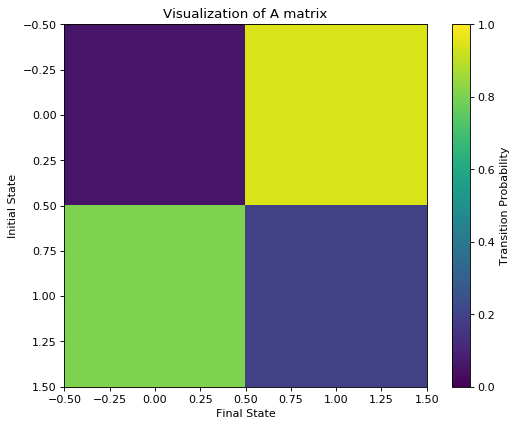

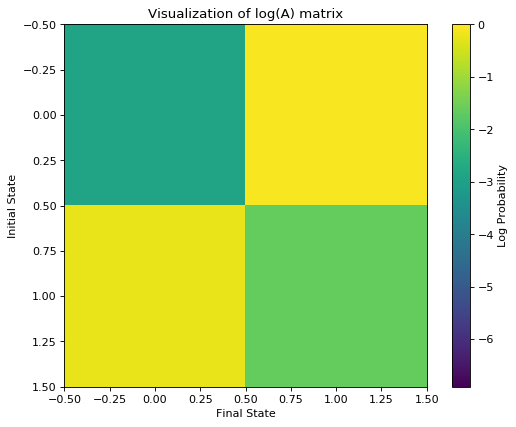

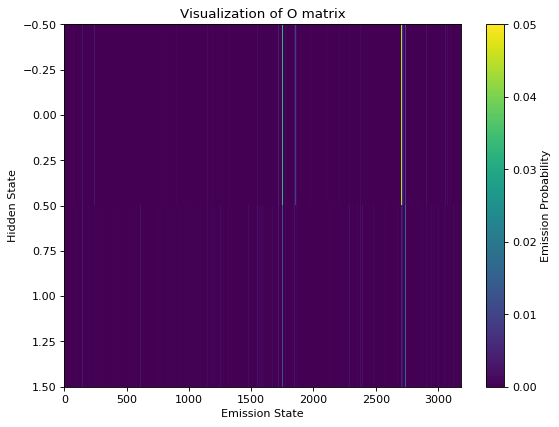

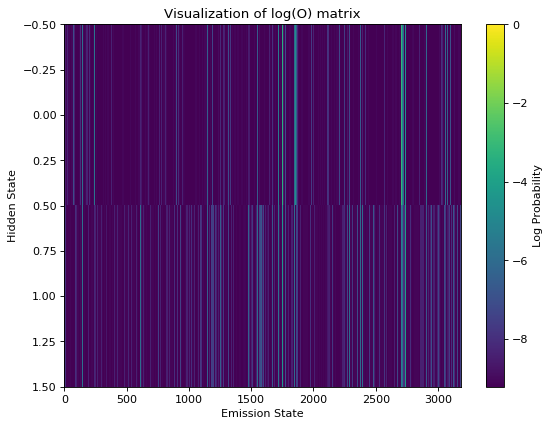

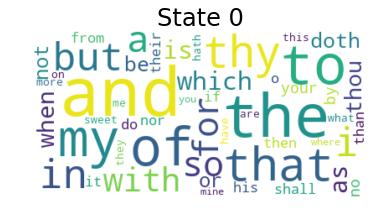

Top Words: ['and', 'the', 'to', 'of', 'my', 'that', 'thy', 'in', 'i', 'but']


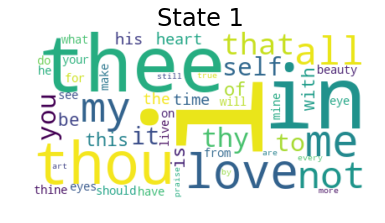

Top Words: ['i', 'in', 'thee', 'thou', 'love', 'me', 'my', 'all', 'not', 'that']
Hidden Markov Model: 4 hidden states


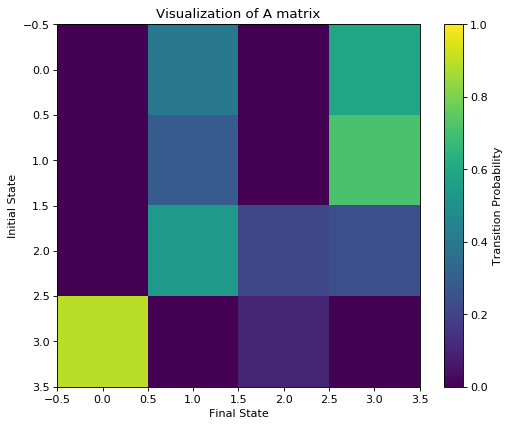

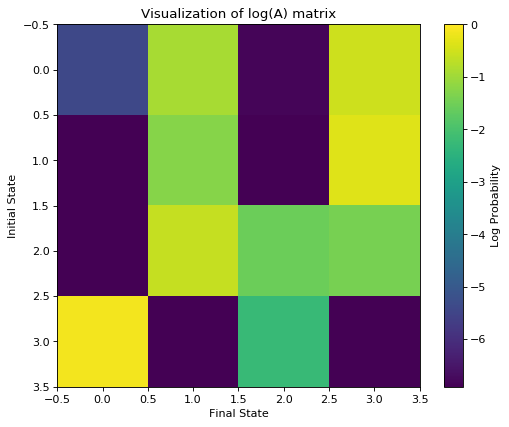

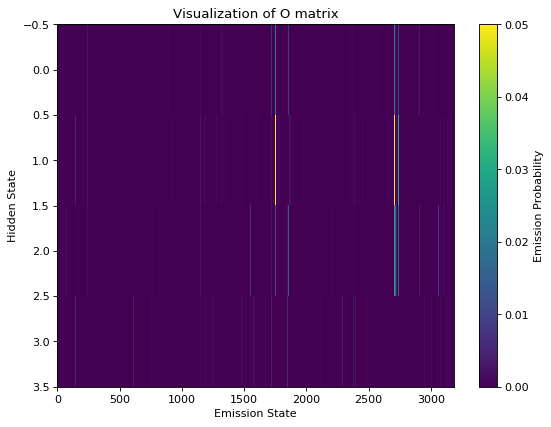

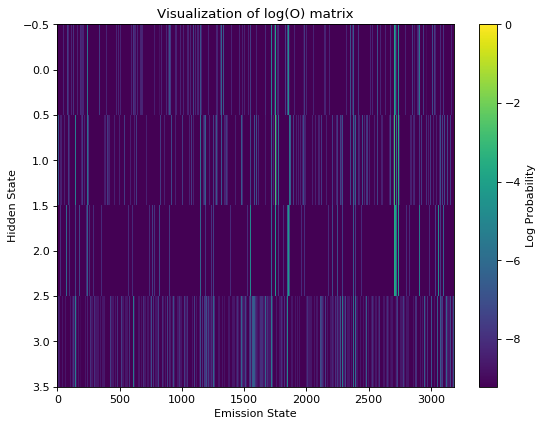

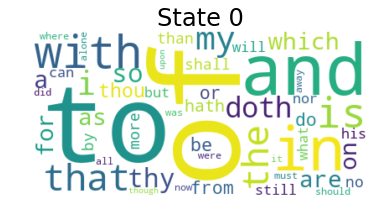

Top Words: ['of', 'to', 'and', 'in', 'with', 'is', 'that', 'the', 'my', 'i']


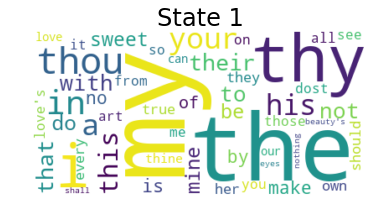

Top Words: ['my', 'the', 'thy', 'i', 'thou', 'in', 'a', 'your', 'his', 'this']


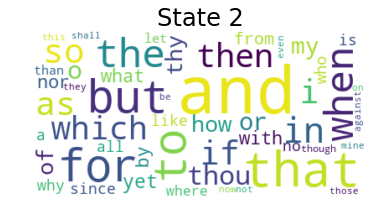

Top Words: ['and', 'that', 'but', 'for', 'to', 'when', 'the', 'in', 'so', 'if']


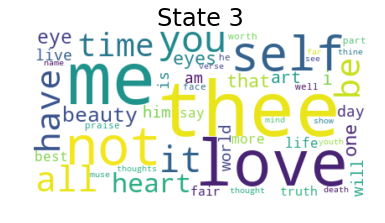

Top Words: ['thee', 'me', 'love', 'not', 'self', 'you', 'it', 'all', 'have', 'be']
Hidden Markov Model: 8 hidden states


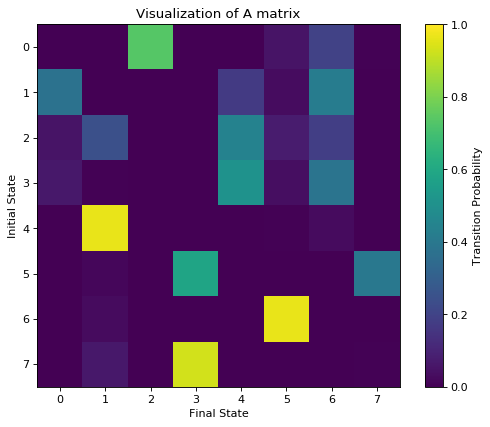

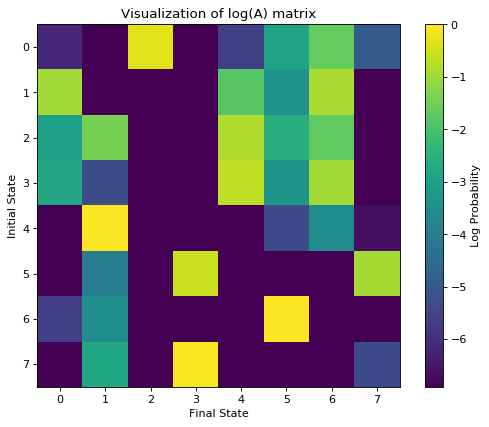

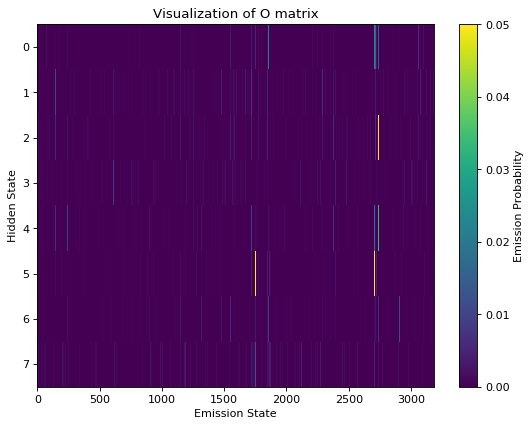

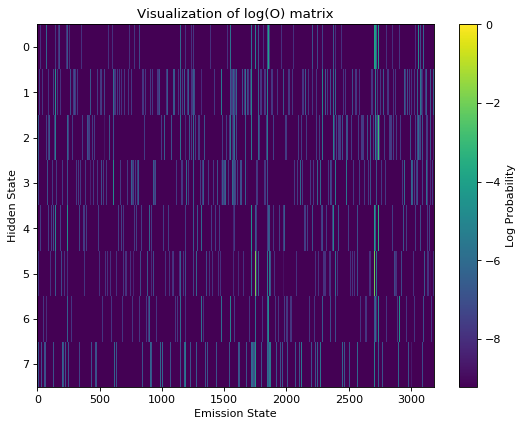

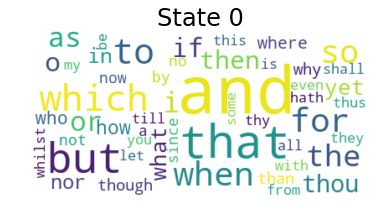

Top Words: ['and', 'that', 'but', 'which', 'to', 'when', 'for', 'so', 'the', 'i']


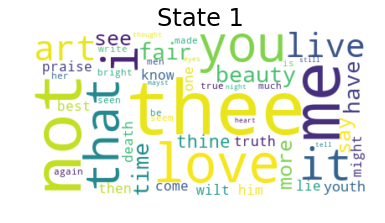

Top Words: ['thee', 'not', 'me', 'love', 'you', 'i', 'that', 'it', 'art', 'live']


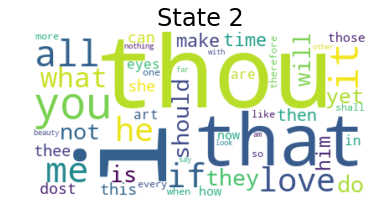

Top Words: ['i', 'thou', 'that', 'you', 'it', 'all', 'me', 'if', 'he', 'love']


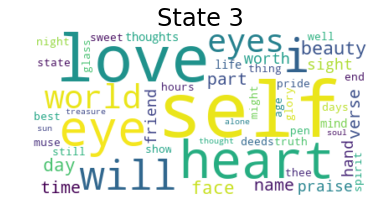

Top Words: ['self', 'love', 'heart', 'eye', 'i', 'will', 'eyes', 'world', 'beauty', 'face']


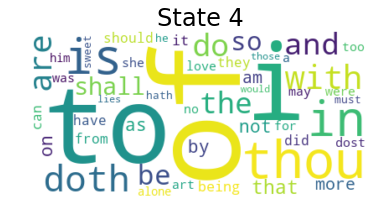

Top Words: ['of', 'to', 'i', 'thou', 'is', 'in', 'doth', 'with', 'are', 'do']


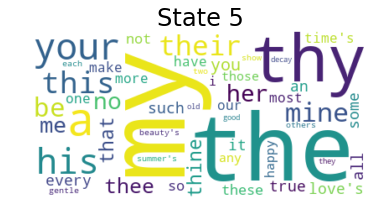

Top Words: ['my', 'the', 'thy', 'a', 'your', 'his', 'this', 'their', 'mine', 'be']


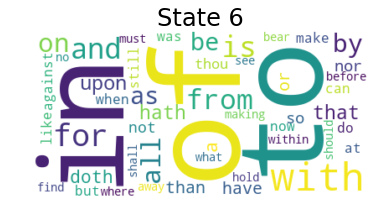

Top Words: ['of', 'to', 'in', 'with', 'for', 'is', 'and', 'from', 'all', 'on']


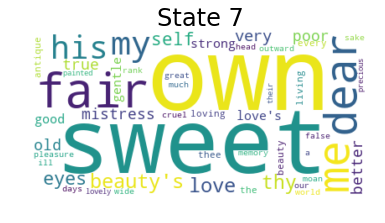

Top Words: ['own', 'sweet', 'fair', 'me', 'dear', 'my', 'his', "beauty's", 'love', 'thy']
Hidden Markov Model: 16 hidden states


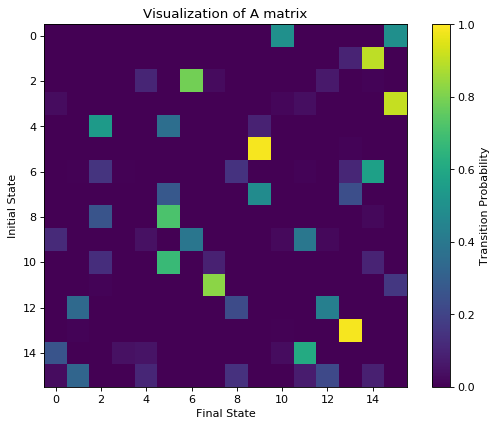

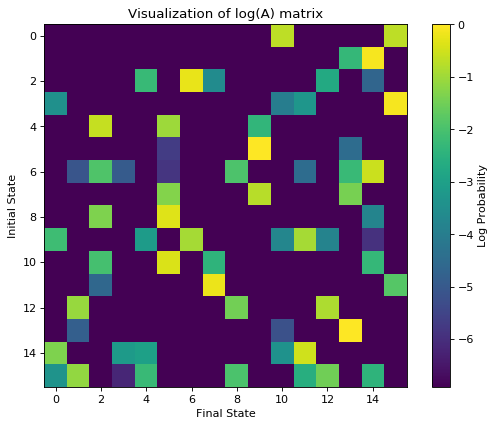

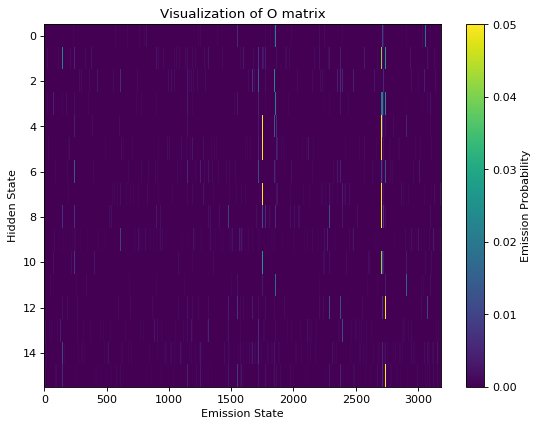

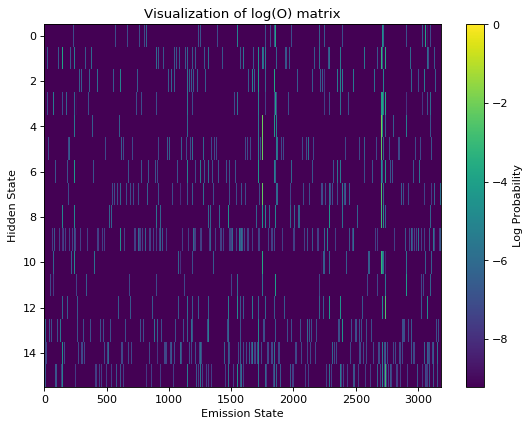

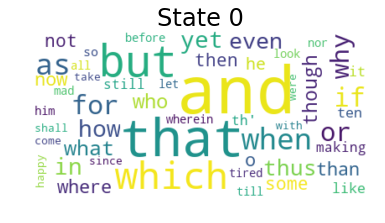

Top Words: ['and', 'that', 'but', 'which', 'as', 'when', 'for', 'if', 'or', 'why']


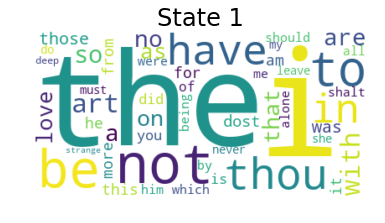

Top Words: ['i', 'the', 'not', 'be', 'to', 'thou', 'have', 'in', 'art', 'with']


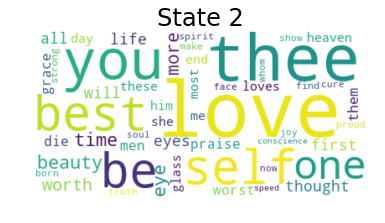

Top Words: ['love', 'thee', 'you', 'self', 'be', 'best', 'one', 'beauty', 'eye', 'time']


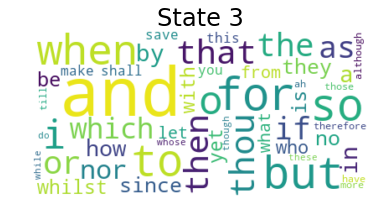

Top Words: ['and', 'for', 'so', 'but', 'to', 'when', 'i', 'o', 'thou', 'that']


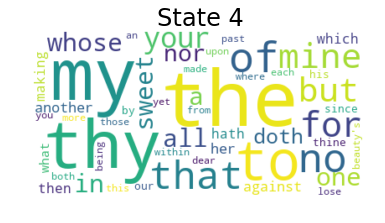

Top Words: ['the', 'my', 'thy', 'to', 'of', 'no', 'that', 'for', 'mine', 'but']


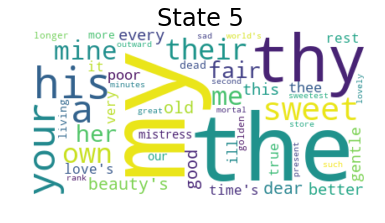

Top Words: ['my', 'the', 'thy', 'his', 'your', 'a', 'sweet', 'their', 'own', 'me']


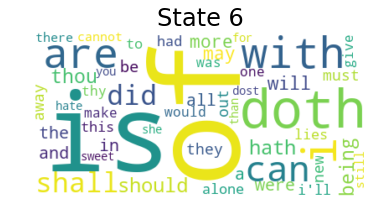

Top Words: ['of', 'is', 'doth', 'i', 'with', 'are', 'can', 'shall', 'did', 'should']


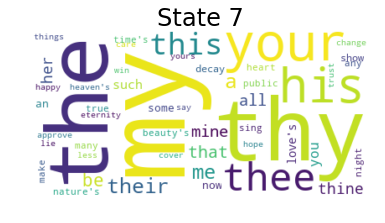

Top Words: ['my', 'thy', 'the', 'your', 'his', 'thee', 'this', 'their', 'a', 'me']


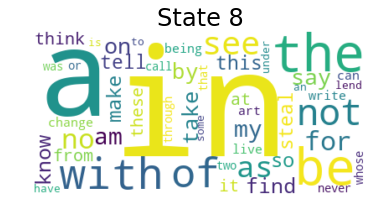

Top Words: ['in', 'a', 'the', 'be', 'with', 'of', 'not', 'see', 'as', 'no']


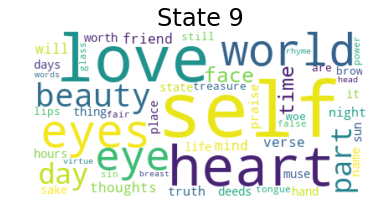

Top Words: ['self', 'love', 'heart', 'eyes', 'world', 'eye', 'beauty', 'day', 'part', 'face']


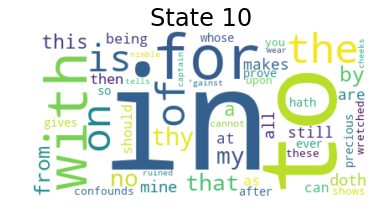

Top Words: ['in', 'to', 'for', 'with', 'the', 'of', 'on', 'is', 'thy', 'my']


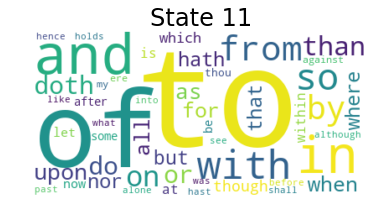

Top Words: ['to', 'of', 'and', 'in', 'with', 'so', 'from', 'by', 'on', 'than']


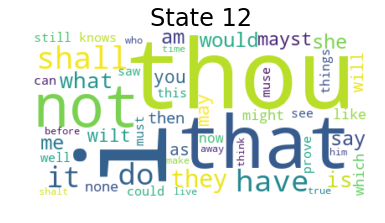

Top Words: ['i', 'thou', 'that', 'not', 'shall', 'do', 'have', 'it', 'they', 'what']


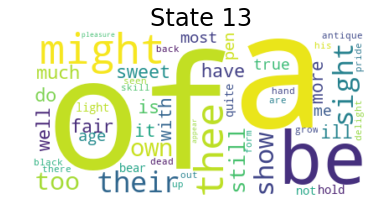

Top Words: ['a', 'of', 'be', 'might', 'thee', 'their', 'sight', 'show', 'too', 'own']


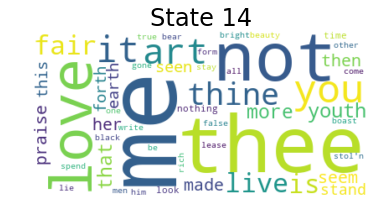

Top Words: ['me', 'thee', 'not', 'love', 'you', 'it', 'art', 'thine', 'fair', 'live']


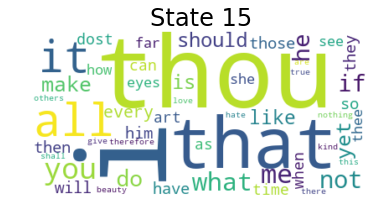

Top Words: ['i', 'thou', 'that', 'all', 'it', 'you', 'me', 'what', 'not', 'if']
Hidden Markov Model: 32 hidden states


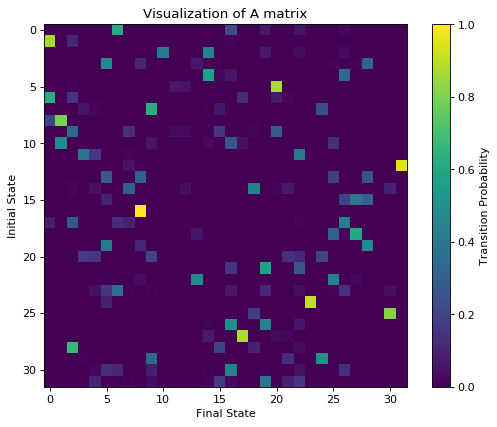

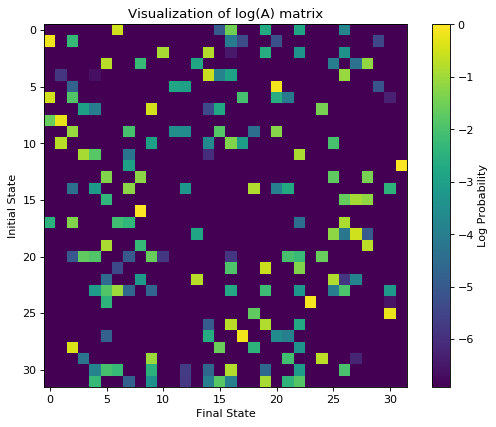

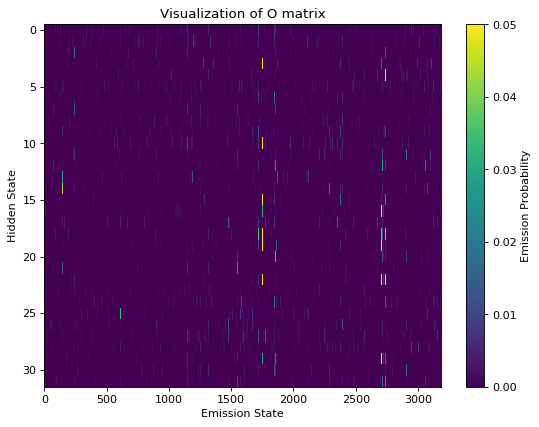

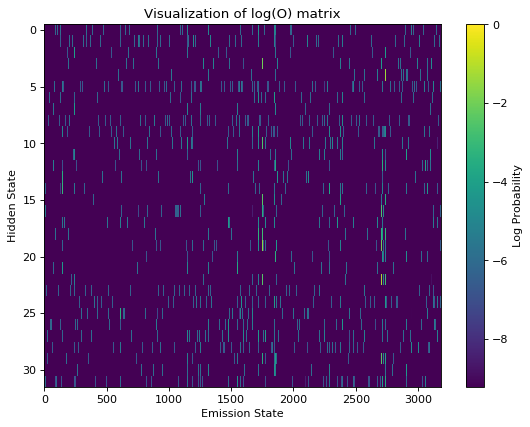

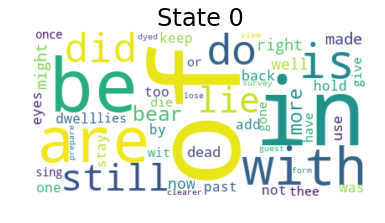

Top Words: ['of', 'in', 'be', 'are', 'with', 'is', 'do', 'did', 'still', 'lie']


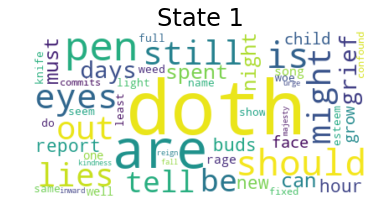

Top Words: ['doth', 'are', 'pen', 'should', 'is', 'eyes', 'still', 'out', 'might', 'lies']


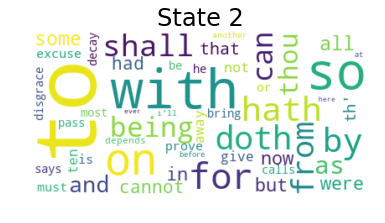

Top Words: ['to', 'with', 'so', 'on', 'for', 'hath', 'by', 'doth', 'from', 'shall']


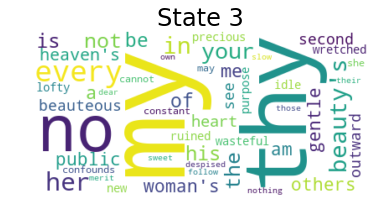

Top Words: ['my', 'thy', 'no', 'every', 'her', 'in', "beauty's", 'your', 'the', 'not']


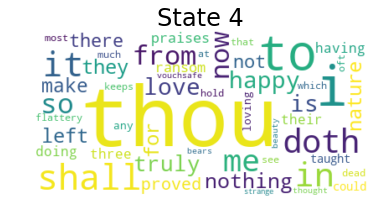

Top Words: ['thou', 'i', 'to', 'shall', 'it', 'in', 'doth', 'me', 'so', 'from']


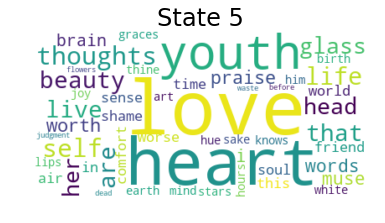

Top Words: ['love', 'heart', 'youth', 'thoughts', 'self', 'life', 'that', 'live', 'are', 'beauty']


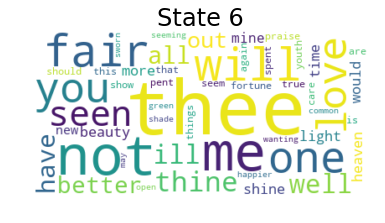

Top Words: ['thee', 'not', 'me', 'will', 'fair', 'one', 'you', 'love', 'seen', 'thine']


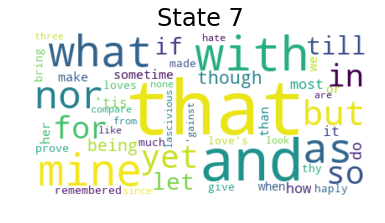

Top Words: ['that', 'and', 'with', 'mine', 'what', 'as', 'nor', 'but', 'so', 'yet']


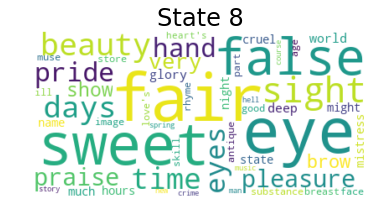

Top Words: ['fair', 'eye', 'sweet', 'false', 'sight', 'beauty', 'days', 'time', 'eyes', 'pride']


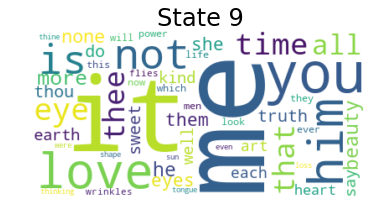

Top Words: ['me', 'it', 'you', 'love', 'him', 'not', 'is', 'eye', 'time', 'thee']


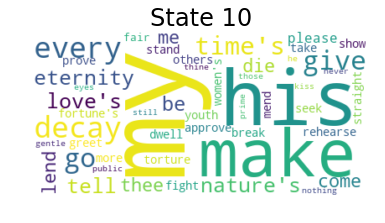

Top Words: ['my', 'his', 'make', 'decay', 'every', 'go', 'give', "time's", 'eternity', 'tell']


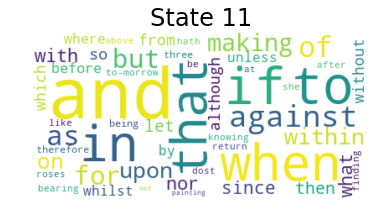

Top Words: ['and', 'to', 'if', 'when', 'in', 'that', 'against', 'of', 'as', 'for']


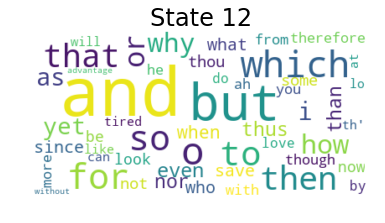

Top Words: ['and', 'but', 'o', 'which', 'for', 'so', 'to', 'then', 'that', 'or']


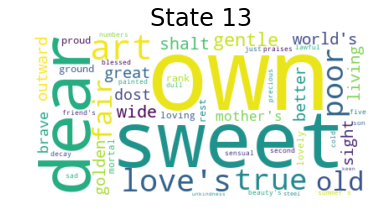

Top Words: ['own', 'sweet', 'dear', 'art', "love's", 'true', 'poor', 'fair', 'old', 'gentle']


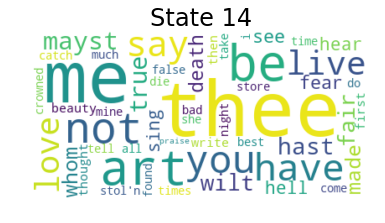

Top Words: ['thee', 'me', 'be', 'art', 'not', 'you', 'have', 'say', 'live', 'love']


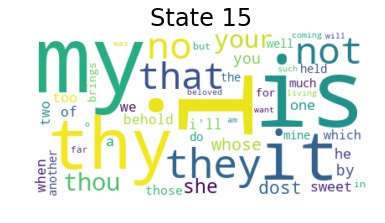

Top Words: ['i', 'is', 'my', 'thy', 'it', 'they', 'not', 'no', 'that', 'your']


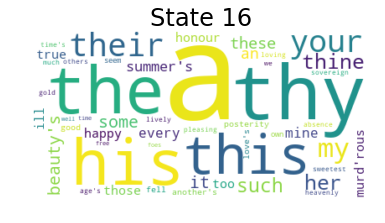

Top Words: ['a', 'thy', 'the', 'his', 'this', 'their', 'your', 'my', 'her', 'thine']


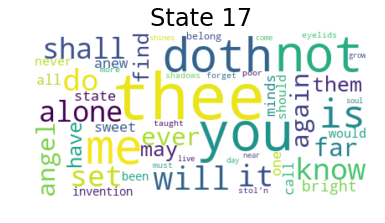

Top Words: ['thee', 'you', 'not', 'me', 'doth', 'is', 'will', 'do', 'it', 'set']


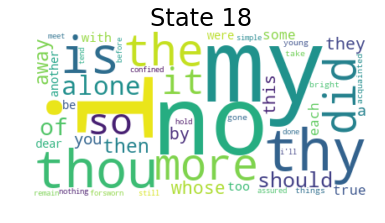

Top Words: ['i', 'my', 'no', 'thy', 'thou', 'is', 'the', 'did', 'more', 'so']


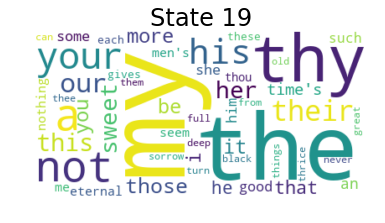

Top Words: ['my', 'the', 'thy', 'a', 'not', 'your', 'his', 'their', 'our', 'this']


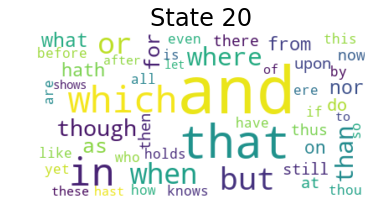

Top Words: ['and', 'that', 'in', 'which', 'but', 'or', 'when', 'where', 'than', 'though']


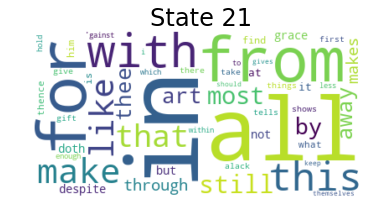

Top Words: ['in', 'all', 'for', 'from', 'with', 'this', 'make', 'like', 'that', 'still']


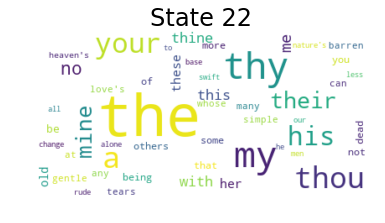

Top Words: ['the', 'thy', 'my', 'a', 'thou', 'your', 'his', 'their', 'mine', 'no']


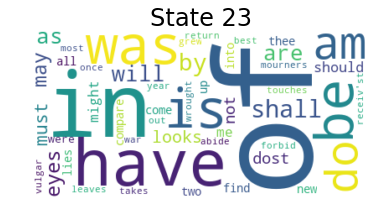

Top Words: ['of', 'in', 'have', 'was', 'is', 'be', 'am', 'do', 'shall', 'by']


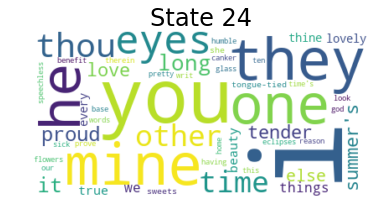

Top Words: ['i', 'you', 'they', 'mine', 'one', 'he', 'eyes', 'thou', 'other', 'time']


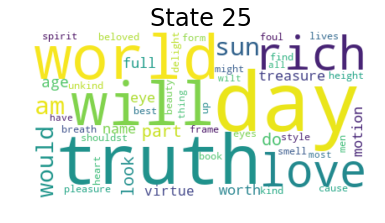

Top Words: ['day', 'truth', 'world', 'will', 'rich', 'love', 'sun', 'am', 'would', 'part']


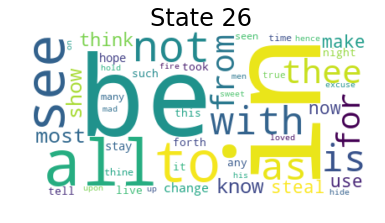

Top Words: ['in', 'be', 'all', 'to', 'see', 'not', 'with', 'as', 'is', 'thee']


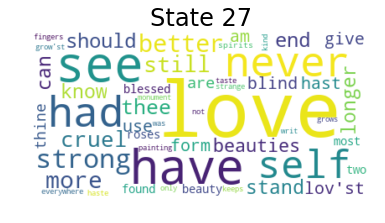

Top Words: ['love', 'see', 'have', 'never', 'had', 'self', 'strong', 'better', 'more', 'still']


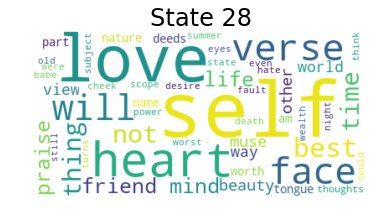

Top Words: ['self', 'love', 'heart', 'verse', 'face', 'will', 'best', 'thing', 'not', 'time']


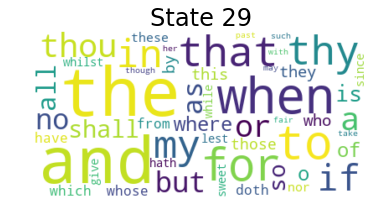

Top Words: ['the', 'and', 'when', 'to', 'for', 'that', 'thy', 'my', 'in', 'if']


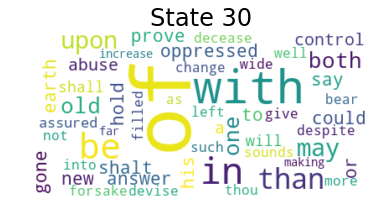

Top Words: ['of', 'with', 'in', 'be', 'than', 'upon', 'may', 'old', 'one', 'both']


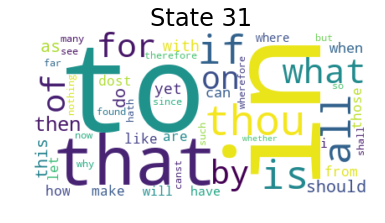

Top Words: ['in', 'to', 'that', 'thou', 'if', 'is', 'all', 'what', 'for', 'of']


In [15]:
for ind in range(len(stateCounts)):
    print("Hidden Markov Model: %d hidden states" % stateCounts[ind])
    vTools.visualizeTransitions(trainedModelParams[ind])
    vTools.visualizeWordClouds(trainedModelParams[ind], encoder)